# Gradient descent

Gradient descent/steepest descent is a favorite punching bag for a lot of optimization texts. But it's an indispensible part of the arsenal. 

There are various ways to describe why GD is slow on some functions. Perhaps the graphical description is the easiest to get.

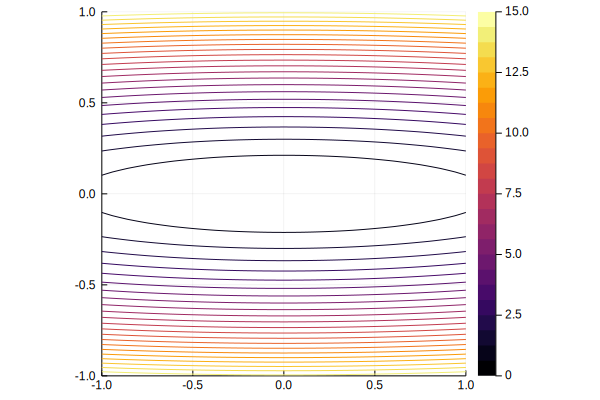

In [1]:
using Plots
f(x) = (x[1]^2 + 29*x[2]^2)/2
x = -1:0.02:1
contour(x,x,(x,y)->f([x,y]),levels=24,aspect_ratio=1)

The minimizer is at the origin. But the gradients at most points point in rather different directions.

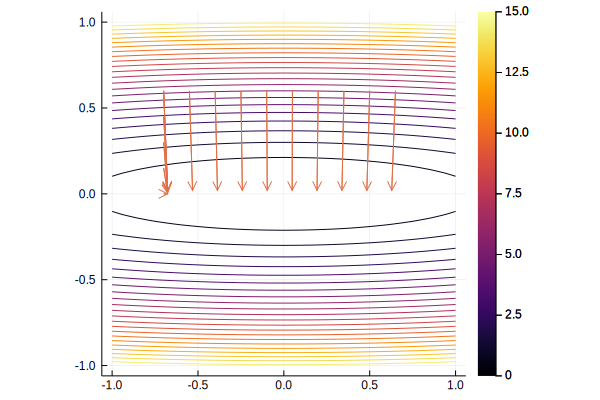

In [2]:
contour(x,x,(x,y)->f([x,y]),levels=24,aspect_ratio=1)

sd(x,y) = (x,29*y)./-30
pts = [(-.7,y) for y in 0:.15:.7]
append!(pts,[(x,.6) for x in -.7:.15:.7])
quiver!(pts,gradient=sd)

If we backtrack to get valid Armijo points in the GD direction, we end up with a zigzag path.

In [3]:
using LinearAlgebra
function backtrack(f,xc,d)
    λ = 1
    fc = f(xc)
    while f(xc+λ*d) - fc > 1e-4*λ*norm(d)
        λ /= 2
    end
    return λ
end

xgd = [1.,1]
for k = 1:30
    xc = xgd[:,k]
    d = -[xc[1],29*xc[2]]
    λ = backtrack(f,xc,d)
    xgd = [xgd xc+λ*d]
end
xgd[:,1:6]

2×6 Array{Float64,2}:
 1.0   0.9375  0.878906   0.823975  0.772476   0.724196
 1.0  -0.8125  0.660156  -0.536377  0.435806  -0.354093

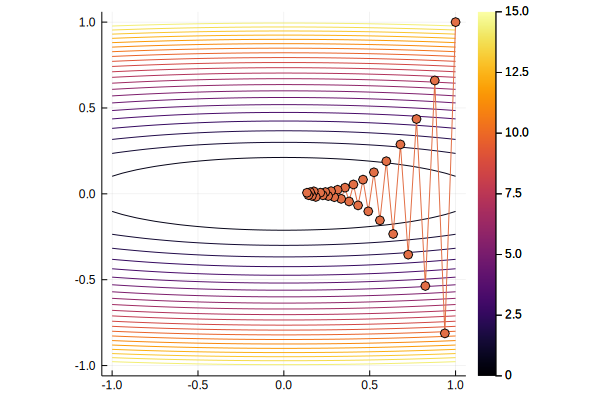

In [4]:
contour(x,x,(x,y)->f([x,y]),levels=24,aspect_ratio=1)
plot!(xgd[1,:],xgd[2,:],m=:o,leg=false)